# Chapter 4 - Exercise Solutions

## Applied

In [329]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt # My code
import statsmodels.api as sm
import statsmodels.formula.api as smf
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from ISLP.models import summarize
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale # My code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # My code

### 13

This question should be answered using the `Weekly` data set, which is part of the `ISLP` package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

**(a)** Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [3]:
Weekly = load_data('Weekly')

In [4]:
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


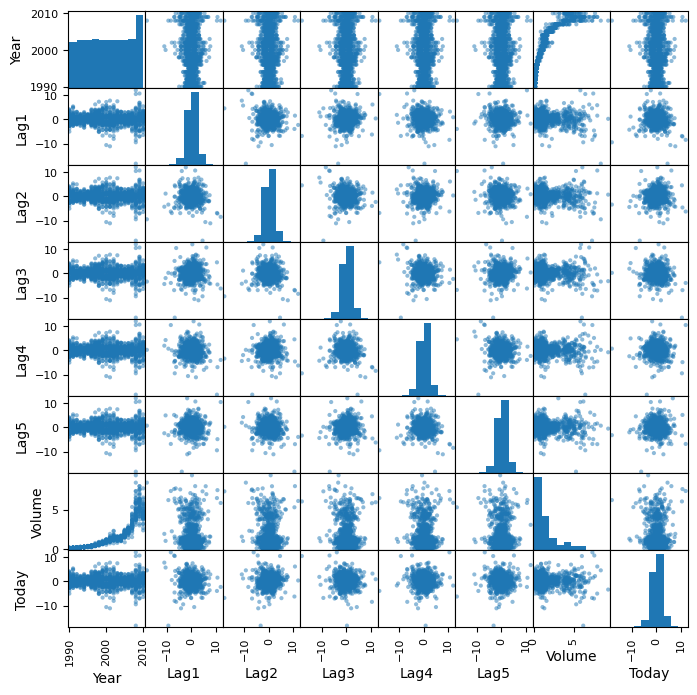

In [10]:
pd.plotting.scatter_matrix(Weekly, figsize=(8,8));


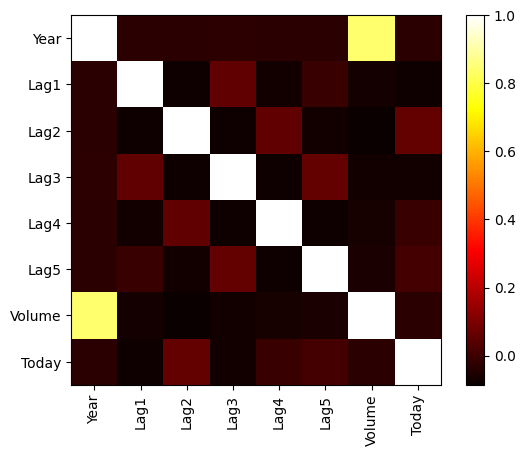

In [8]:
corr_matrix = Weekly.corr(numeric_only=True)
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)  # Add x labels
plt.yticks(range(len(corr_matrix)), corr_matrix.columns);  # Add y labels

In [17]:
Weekly['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [35]:
vol_means = Weekly.groupby('Year')['Volume'].mean(0)

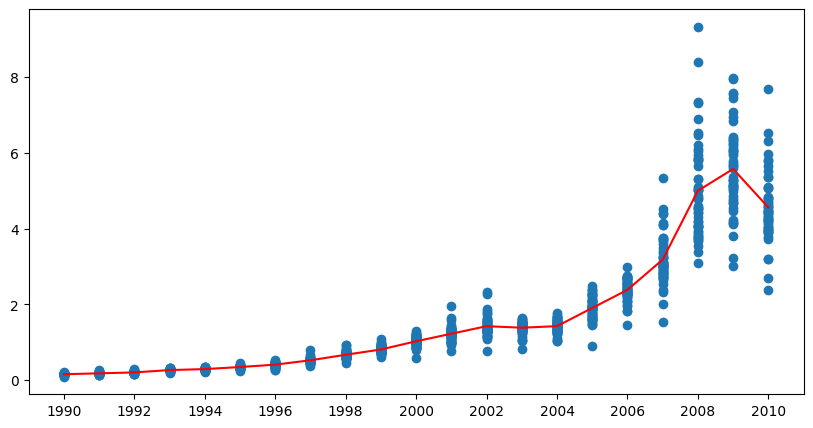

In [34]:
fig, ax = subplots(figsize=(10,5))
ax.scatter(Weekly['Year'], Weekly['Volume'])
ax.plot(Weekly['Year'].unique(), vol_means, color='r')
ax.set_xticks(range(1990, 2011, 2));

In [40]:
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [46]:
up_volume = Weekly.loc[ Weekly['Direction'] == "Up", 'Volume' ] 
down_volume = Weekly.loc[ Weekly['Direction'] == "Down", 'Volume' ] 


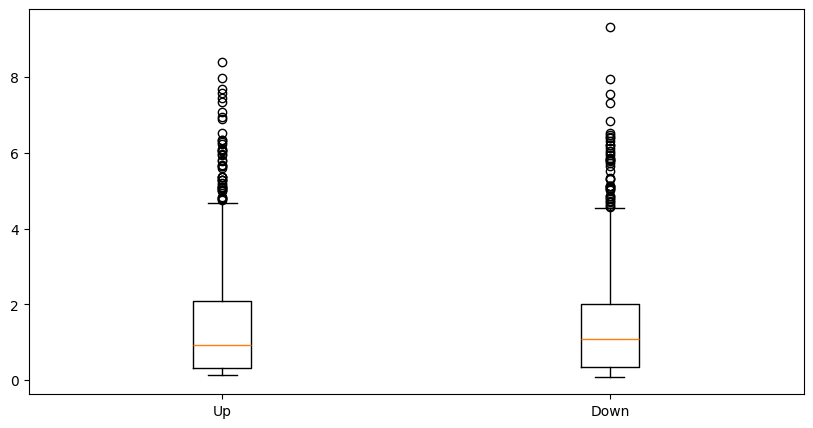

In [52]:
fig, ax = subplots(figsize=(10,5))
ax.boxplot([up_volume, down_volume], labels=['Up', 'Down']);

**(b)** Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [53]:
Weekly['DirectionB'] = [1 if i  == 'Up' else 0 for i in Weekly['Direction']]

In [78]:
Weekly.head()
Weekly.shape

(1089, 10)

In [74]:
varlist = Weekly.columns.drop(['Direction', 'DirectionB', 'Year', 'Today'])
predictorStr = ' + '.join(varlist)
formulaStr = 'DirectionB ~ ' + predictorStr

model_13b_logistic = smf.glm(formula=formulaStr, data=Weekly, family=sm.families.Binomial())
results_13b_logistic = model_13b_logistic.fit()
print(results_13b_logistic.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             DirectionB   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Wed, 27 Dec 2023   Deviance:                       1486.4
Time:                        14:22:42   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.0

Significant: `Intercept` and `Lag2`.

**(c)** Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [83]:
# Predicted probabilities
probs_13b = results_13b_logistic.predict()
probs_13b.shape[0]

1089

In [84]:
# Predicted labels
labels_13b = np.array(['Down']* probs_13b.shape[0] ) # An array of 'Down' same shape as probabilities
labels_13b[probs_13b > 0.5] = "Up"
labels_13b.shape

(1089,)

In [86]:
# Confusion matrix (ISLP)
confusion_table(labels_13b, Weekly['Direction'])

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [88]:
# Proportion of events correct
(54 + 557) / 1089

0.5610651974288338

In [87]:
# Proportion of events correct
np.mean( labels_13b == Weekly['Direction'])

0.5610651974288338

In [89]:
# Proportion of 'up' correct
557 / (557 + 48)

0.9206611570247933

In [90]:
# Proportion of 'down' correct
54 / (45 + 430)

0.11368421052631579

The overall prediction rate is 56% correct. For 'up' it is 92% correct, for 'down' it is 11% correct.

**(d)** Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [96]:
# Data from 1990-2008
WeeklyTrain = Weekly.loc[ Weekly['Year'] < 2009, : ]

# Data from 2009-2010
WeeklyTest = Weekly.loc[ Weekly['Year'] >= 2009, : ]

In [101]:
model_13d = smf.glm(formula='DirectionB ~ Lag2', data=WeeklyTrain, family=sm.families.Binomial())
results_13d = model_13d.fit()
print(results_13d.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             DirectionB   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Wed, 27 Dec 2023   Deviance:                       1350.5
Time:                        17:00:15   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.0

In [109]:
# probs_13d = results_13d.predict(exog=WeeklyTest['Lag2'])
probs_13d = results_13d.predict(exog=WeeklyTest)

In [120]:
labels_13d = np.array(['Down'] * WeeklyTest.shape[0])
# labels_13d.shape
labels_13d[probs_13d > 0.5] = 'Up'
# labels_13d

In [115]:
confusion_table(labels_13d, WeeklyTest['Direction'])

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [116]:
np.mean( labels_13d == WeeklyTest['Direction'] )

0.625

In [117]:
# Proportion overall correct
(9 + 56)/ WeeklyTest.shape[0]

0.625

In [118]:
# Proportion 'up' correct
56 / (56 + 5)

0.9180327868852459

In [119]:
# Proportion 'down' correct
9 / (9 + 34)

0.20930232558139536

**(e)** Repeat (d) using LDA.

In [127]:
lda_13e = LDA(store_covariance=True)
lda_13e.fit(WeeklyTrain['Lag2'].values.reshape(-1,1), WeeklyTrain['Direction']) # sklearn wants a 2D array even if only one predictor

LinearDiscriminantAnalysis(store_covariance=True)

In [128]:
# Mean of lag2 for each class
lda_13e.means_ 

array([[-0.03568254],
       [ 0.26036581]])

In [129]:
lda_13e.classes_

array(['Down', 'Up'], dtype='<U4')

In [130]:
# pi_k priors for each class k
lda_13e.priors_

array([0.44771574, 0.55228426])

In [131]:
# x coefficients, Equation (4.24)
lda_13e.scalings_

array([[0.44141622]])

In [143]:
# Predicted probabilities (e.g. if want to create custom predictions using other than 0.50 threshold)
lda_13e_prob = lda_13e.predict_proba(WeeklyTest['Lag2'].values.reshape(-1,1))
lda_13e_prob.shape

(104, 2)

In [136]:
# Predicted values
lda_13e_pred = lda_13e.predict(WeeklyTest['Lag2'].values.reshape(-1,1))
lda_13e_pred.shape

(104,)

In [138]:
confusion_table(lda_13e_pred, WeeklyTest['Direction'])

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [137]:
np.mean( lda_13e_pred == WeeklyTest['Direction'])

0.625

In [139]:
# Overall
(9 + 56)/ WeeklyTest.shape[0]

0.625

In [140]:
# 'Up'
56 / (5 + 56)

0.9180327868852459

In [141]:
# 'Down'
9 / (9 + 34)

0.20930232558139536

**(f)** Repeat (d) using QDA.

In [164]:
qda_13 = QDA(store_covariance=True)
qda_13.fit(WeeklyTrain['Lag2'].values.reshape(-1,1), WeeklyTrain['Direction']) # sklearn wants a 2D array even if only one predictor

QuadraticDiscriminantAnalysis(store_covariance=True)

In [165]:
# Mean of lag2 for each class
qda_13.means_

array([[-0.03568254],
       [ 0.26036581]])

In [166]:
qda_13.classes_

array(['Down', 'Up'], dtype=object)

In [167]:
# pi_k priors for each class k
qda_13.priors_

array([0.44771574, 0.55228426])

In [168]:
# x coefficients, Equation (4.28)
qda_13.scalings_

[array([4.83781758]), array([5.37073888])]

In [169]:
# Predicted probabilities (e.g. if want to create custom predictions using other than 0.50 threshold)
qda_13_prob = qda_13.predict_proba(WeeklyTest['Lag2'].values.reshape(-1,1))
qda_13_prob.shape

(104, 2)

In [170]:
# Predicted values
qda_13_pred = qda_13.predict(WeeklyTest['Lag2'].values.reshape(-1,1))
qda_13_pred.shape

(104,)

In [171]:
confusion_table(qda_13_pred, WeeklyTest['Direction'])

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


QDA predicts all days will be 'up'!

In [172]:
np.mean( qda_13_pred == WeeklyTest['Direction'])

0.5865384615384616

In [156]:
# Overall
61 / WeeklyTest.shape[0]

0.5865384615384616

In [158]:
# Up
61 / 61

1.0

In [159]:
# Down
0 / 43

0.0

**(g)** Repeat (d) using KNN with *K* = 1.

In [173]:
knn1_13 = KNeighborsClassifier(n_neighbors=1)
knn1_13.fit(WeeklyTrain['Lag2'].values.reshape(-1,1), WeeklyTrain['Direction'])
knn1_13_pred = knn1_13.predict(WeeklyTest['Lag2'].values.reshape(-1,1))
confusion_table(knn1_13_pred, WeeklyTest['Direction'])

Truth,Down,Up
Predicted,,
Down,21,30
Up,22,31


In [174]:
(21 + 31)/WeeklyTest.shape[0], np.mean(knn1_13_pred == WeeklyTest['Direction'])

(0.5, 0.5)

**(h)** Repeat (d) using naive Bayes.

In [175]:
NB_13 = GaussianNB()
NB_13.fit(WeeklyTrain['Lag2'].values.reshape(-1,1), WeeklyTrain['Direction'])

GaussianNB()

In [180]:
NB_13.classes_
NB_13.class_prior_
NB_13.theta_ # predicdtor means by class
NB_13.var_ # predictor variances by class

array([[4.82684748],
       [5.3608662 ]])

In [183]:
NB_13_pred = NB_13.predict(WeeklyTest['Lag2'].values.reshape(-1,1))
confusion_table(NB_13_pred, WeeklyTest['Direction'])

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [185]:
61 / WeeklyTest.shape[0], np.mean(NB_13_pred == WeeklyTest['Direction'])

(0.5865384615384616, 0.5865384615384616)

**(i)** Which of these methods appears to provide the best results on this data?

Logistic regression and LDA are the best, both performfing nearly identically at 0.625 accuracy. KNN with K=1 is 0.5, and QDA and Naive Bayes both predicted all days to be 'Up' with 0.58 accuracy.

**(j)** Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [508]:
# Uses StandardScaler class
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(WeeklyTrain.drop(columns=['Direction', 'DirectionB', 'Today']))
X_std = scaler.transform(WeeklyTrain.drop(columns=['Direction', 'DirectionB', 'Today']))
feature_std = pd.DataFrame(X_std, columns=WeeklyTrain.drop(columns=['Direction', 'DirectionB', 'Today']).columns);

In [230]:
df_to_scale = WeeklyTrain.drop(columns=['Direction', 'DirectionB'])
WeeklyTrainScale = pd.DataFrame(scale(df_to_scale), columns=df_to_scale.columns)
# WeeklyTrainScale.std()
# WeeklyTrainScale.mean()
Xtrain_KNN = WeeklyTrainScale.drop(columns=['Today'])

In [223]:
df_to_scale = WeeklyTest.drop(columns=['Direction','DirectionB'])
WeeklyTestScale = pd.DataFrame(scale(df_to_scale), columns=df_to_scale.columns)
Xtest_KNN = WeeklyTestScale.drop(columns=['Today'])

In [235]:
knn2_13 = KNeighborsClassifier(n_neighbors=2)
knn2_13.fit(Xtrain_KNN, WeeklyTrain['Direction'])
knn2_13_pred = knn2_13.predict(Xtest_KNN)
confusion_table(knn2_13_pred, WeeklyTest['Direction'])

Truth,Down,Up
Predicted,,
Down,29,44
Up,14,17


In [261]:
for K in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(Xtrain_KNN, WeeklyTrain['Direction']).predict(Xtest_KNN)
    C = confusion_table(knn_pred, WeeklyTest['Direction'])
    accDown = C.loc['Down', 'Down'] / C.loc[ : , 'Down'].sum() # Accuracy 'Down'
    accUp = C.loc['Up', 'Up'] / C.loc[ : , 'Up'].sum() # Accuracy 'Up'
    accAll = (C.loc['Down', 'Down'] + C.loc['Up', 'Up']) / ( C.loc[ : , 'Down'].sum() + C.loc[ : , 'Up'].sum() ) # Accuracy overall 
    print(f'K = {K:2.0f}: Down accuracy {accDown:4.2f} | Up accuracy {accUp:4.2f} | Overall acccuracy {accAll:4.2f}')


K =  1: Down accuracy 0.42 | Up accuracy 0.64 | Overall acccuracy 0.55
K =  2: Down accuracy 0.67 | Up accuracy 0.28 | Overall acccuracy 0.44
K =  3: Down accuracy 0.28 | Up accuracy 0.66 | Overall acccuracy 0.50
K =  4: Down accuracy 0.51 | Up accuracy 0.41 | Overall acccuracy 0.45
K =  5: Down accuracy 0.33 | Up accuracy 0.67 | Overall acccuracy 0.53
K =  6: Down accuracy 0.53 | Up accuracy 0.48 | Overall acccuracy 0.50
K =  7: Down accuracy 0.35 | Up accuracy 0.62 | Overall acccuracy 0.51
K =  8: Down accuracy 0.49 | Up accuracy 0.56 | Overall acccuracy 0.53
K =  9: Down accuracy 0.37 | Up accuracy 0.67 | Overall acccuracy 0.55
K = 10: Down accuracy 0.49 | Up accuracy 0.59 | Overall acccuracy 0.55
K = 11: Down accuracy 0.37 | Up accuracy 0.66 | Overall acccuracy 0.54
K = 12: Down accuracy 0.44 | Up accuracy 0.56 | Overall acccuracy 0.51
K = 13: Down accuracy 0.33 | Up accuracy 0.66 | Overall acccuracy 0.52
K = 14: Down accuracy 0.37 | Up accuracy 0.56 | Overall acccuracy 0.48
K = 15

### 14

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

**(a)** Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:

```
Auto['mpg01'] = mpg01
```


In [271]:
Auto = load_data('Auto')

In [272]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [274]:
Auto['mpg01'] = np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)
# Auto['mpg02'] = [1 if i > Auto['mpg'].median() else 0 for i in Auto['mpg']]
# np.allclose(Auto['mpg01'], Auto['mpg02'])

In [275]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


**(b)** Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [316]:
AutoSimp = Auto.drop(columns=['mpg', 'year', 'origin', 'name'])

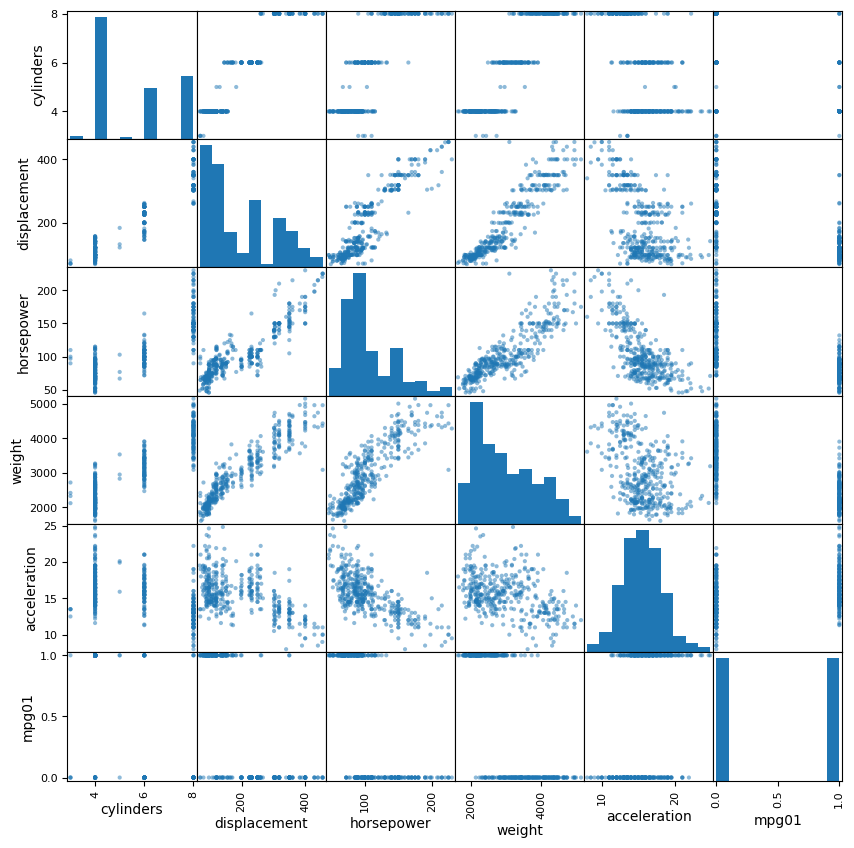

In [317]:
pd.plotting.scatter_matrix(AutoSimp, figsize=(10,10));

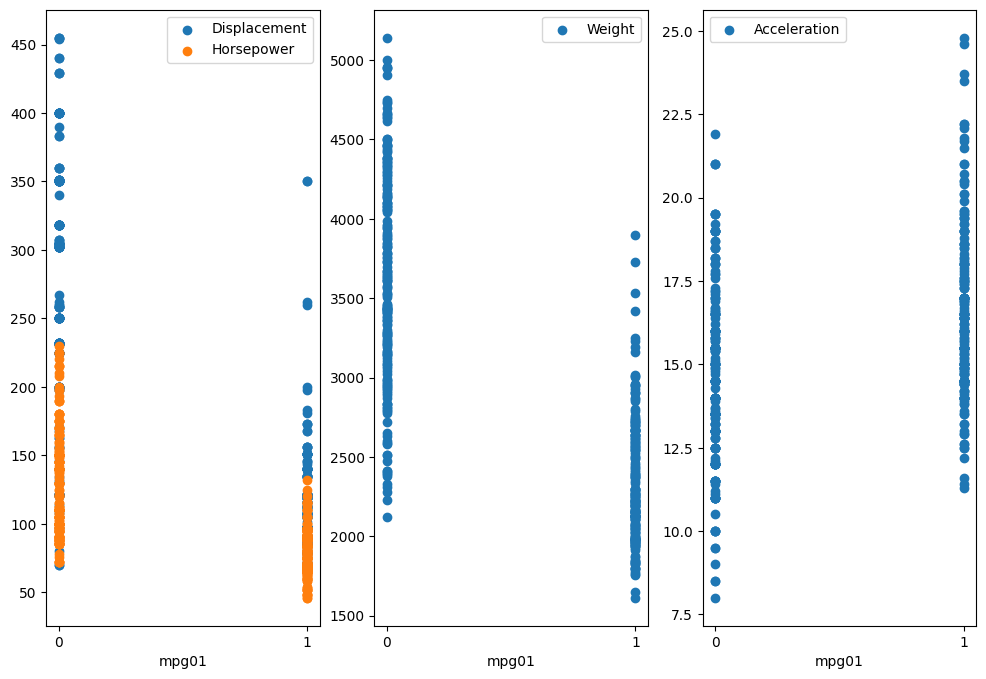

In [303]:
fig, ax = subplots(figsize=(12,8), nrows=1, ncols=3)
ax[0].scatter(Auto['mpg01'], Auto['displacement'], label='Displacement')
ax[0].scatter(Auto['mpg01'], Auto['horsepower'], label='Horsepower')
ax[1].scatter(Auto['mpg01'], Auto['weight'], label='Weight')
ax[2].scatter(Auto['mpg01'], Auto['acceleration'], label='Acceleration')
ax[0].set_xticks((0,1))
ax[0].set_xlabel('mpg01')
ax[1].set_xticks((0,1))
ax[1].set_xlabel('mpg01')
ax[2].set_xticks((0,1))
ax[2].set_xlabel('mpg01')
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[2].legend(loc="upper left");

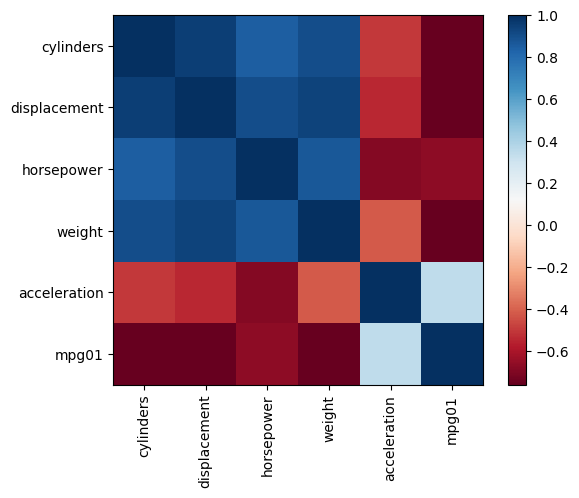

In [321]:
corr_matrix = AutoSimp.corr(numeric_only=True)
plt.imshow(corr_matrix, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)  # Add x labels
plt.yticks(range(len(corr_matrix)), corr_matrix.columns);  # Add y labels

**(c)** Split the data into a training set and a test set.

In [322]:
Auto.drop(columns=['mpg', 'mpg01', 'year', 'origin', 'name', 'acceleration']).head()

,cylinders,displacement,horsepower,weight
0,8,307.0,130,3504
1,8,350.0,165,3693
2,8,318.0,150,3436
3,8,304.0,150,3433
4,8,302.0,140,3449


In [323]:
(X_train, X_test, y_train, y_test) = train_test_split(Auto.drop(columns=['mpg', 'mpg01', 'year', 'origin', 'name', 'acceleration']), Auto['mpg01'], test_size=150, random_state=0)
# X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape

**(d)** Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [325]:
lda_14 = LDA(store_covariance=True)
lda_14.fit(X_train, y_train)
lda_14_pred = lda_14.predict(X_test)
confusion_table(lda_14_pred, y_test)

Truth,0,1
Predicted,,
0,58,7
1,11,74


In [327]:
# Test error rate
np.mean(lda_14_pred == y_test), (58 + 74) / y_test.shape[0]

(0.88, 0.88)

In [330]:
# Test error rate using sklearn
accuracy_score(y_test, lda_14_pred)

0.88

**(e)** Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [331]:
qda_14 = QDA(store_covariance=True)
qda_14.fit(X_train, y_train)
qda_14_pred = qda_14.predict(X_test)
confusion_table(qda_14_pred, y_test)

Truth,0,1
Predicted,,
0,60,9
1,9,72


In [332]:
accuracy_score(y_test, qda_14_pred)

0.88

**(f)** Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [334]:
glm_14 = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(glm_14.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  242
Model:                            GLM   Df Residuals:                      238
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -89.169
Date:                Thu, 28 Dec 2023   Deviance:                       178.34
Time:                        16:47:00   Pearson chi2:                     680.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4763
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders        1.2500      0.331      3.773   

In [343]:
glm_14_probs = glm_14.predict(exog=X_test)
glm_14_labels = np.zeros((X_test.shape[0]))
glm_14_labels[glm_14_probs > 0.5] = 1
confusion_table(glm_14_labels, y_test)

Truth,0.0,1.0
Predicted,,
0.0,60,16
1.0,9,65


In [346]:
# np.mean(glm_14_labels == y_test)
accuracy_score(y_test, glm_14_labels)

0.8333333333333334

**(g)** Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [347]:
NB_14 = GaussianNB()
NB_14.fit(X_train, y_train)
NB_14_pred = NB_14.predict(X_test)
confusion_table(NB_14_pred, y_test)

Truth,0,1
Predicted,,
0,60,8
1,9,73


In [349]:
# np.mean(NB_14_pred == y_test)
accuracy_score(y_test, NB_14_pred)

0.8866666666666667

**(h)** Perform KNN on the training data, with several values of *K*, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [359]:
for K in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    accAll = accuracy_score(y_test, knn_pred)
    print(f'K = {K:3.0f} | Accuracy = {accAll:0.2f}')


K =   1 | Accuracy = 0.87
K =   2 | Accuracy = 0.86
K =   3 | Accuracy = 0.89
K =   4 | Accuracy = 0.87
K =   5 | Accuracy = 0.86
K =   6 | Accuracy = 0.86
K =   7 | Accuracy = 0.85
K =   8 | Accuracy = 0.86
K =   9 | Accuracy = 0.85


*K* is best at 3, and doesn't seem to improve (up to 99).

### 15

This problem involves writing functions.

**(a)** Write a function, `Power()`, that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 23 and print out the results.

*Hint: Recall that* `x**a` *raises x to the power a. Use the* `print()` *function to display the result.*

In [366]:
def Power():
    print(f'2^3 = {2**3:2.0f}')

Power()

2^3 =  8


**(b)** Create a new function, `Power2()`, that allows you to pass any two numbers, `x` and `a`, and prints out the value of `x**a`. You can do this by beginning your function with the line

```
def Power2(x, a):
```
You should be able to call your function by entering, for instance,
```
Power2(3, 8)
```
on the command line. This should output the value of $3^8$, namely, 6,561.


In [374]:
def Power2(x, a):
    r = x ** a
    print(f'{x:2.0f}^{a} = {r:2.0f}')

In [369]:
Power2(3, 8)

 3^ 8 = 6561


**(c)** Using the `Power2()` function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.

In [371]:
Power2(10, 3)

Power2(8, 17)

Power2(131, 3)

10^ 3 = 1000
 8^17 = 2251799813685248
131^ 3 = 2248091


**(d)** Now create a new function, `Power3()`, that actually returns the result `x**a` as a Python object, rather than simply printing it to the screen. That is, if you store the value `x**a` in an object called `result` within your function, then you can simply return this result, using the following line:
```
return result
```
Note that the line above should be the last line in your function, and it should be indented 4 spaces.

In [372]:
def Power3(x, a):
    r = x ** a
    return r

In [376]:
Power3(131, 3)

2248091

**(e)** Now using the `Power3()` function, create a plot of $f(x) = x^2$. The x-axis should display a range of integers from 1 to 10, and the y-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using the `ax.set_xscale()` and `ax.set_yscale()` methods of the axes you are plotting to.

In [382]:
x = np.arange(0, 11)
y = Power3(x, 2)

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

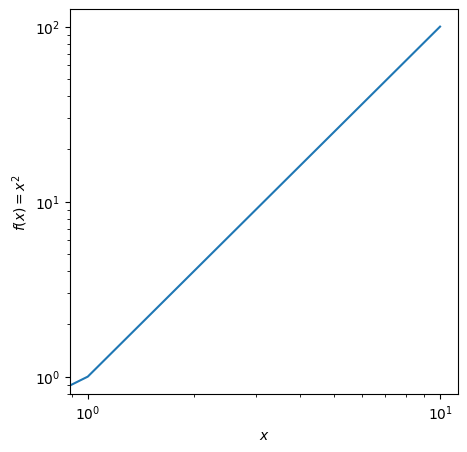

In [392]:
fig, ax = subplots(figsize=(5,5))
ax.plot(x, y)
ax.set_xticks(np.arange(0, 11))
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x) = x^2$')
ax.set_yscale('log')
ax.set_xscale('log');

**(f)** Create a function, `PlotPower()`, that allows you to create a plot of `x` against `x**a `for a fixed `a` and a sequence of values of `x`. For instance, if you call

```
PlotPower(np.arange(1, 11), 3)
```

then a plot should be created with an *x*-axis taking on values 1,2,...,10, and a *y*-axis taking on values $1^3$, $2^3$ ,..., $10^3$.


In [405]:
def PlotPower(x, a):
    y = x ** a
    fig, ax = subplots(figsize=(5,5))
    ax.plot(x, y)
    # ax.set_xticks(np.arange(0, 11))
    ax.set_xlabel('x')
    ax.set_ylabel(f'f(x) = x^{a}')
    

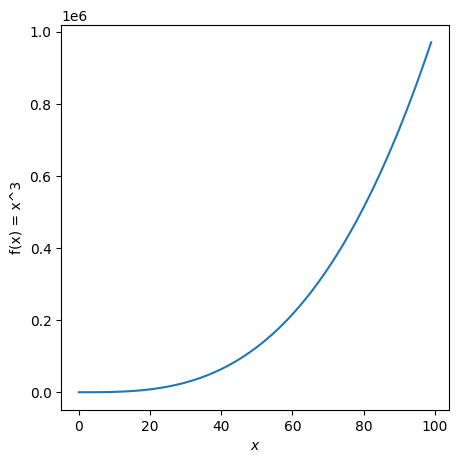

In [403]:
PlotPower(np.arange(0,100), 3)

### 16

Using the `Boston` data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.

*Hint: You will have to create the response variable yourself, using the variables that are contained in the* `Boston` *data set*.

In [407]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [477]:
# Crime rate above median: 1
Boston['crim01'] = np.where(Boston['crim'] > Boston['crim'].median(), 1, 0)
Boston['crim01'].value_counts()

0    253
1    253
Name: crim01, dtype: int64

In [488]:
# Strongest predictos:
BostonSmall = Boston.loc[:, ['crim01', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio']]

        crim01    nox    age    dis    rad    tax ptratio
crim01    1.00   0.72   0.61  -0.62   0.62   0.61    0.25
nox       0.72   1.00   0.73  -0.77   0.61   0.67    0.19
age       0.61   0.73   1.00  -0.75   0.46   0.51    0.26
dis      -0.62  -0.77  -0.75   1.00  -0.49  -0.53   -0.23
rad       0.62   0.61   0.46  -0.49   1.00   0.91    0.46
tax       0.61   0.67   0.51  -0.53   0.91   1.00    0.46
ptratio   0.25   0.19   0.26  -0.23   0.46   0.46    1.00


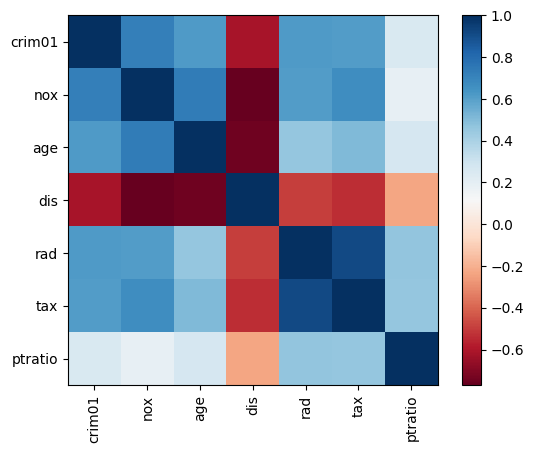

In [489]:
corr_matrix = BostonSmall.corr(numeric_only=True)
print(corr_matrix.applymap(lambda x: f'{x:.2f}'))
plt.imshow(corr_matrix, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)  # Add x labels
plt.yticks(range(len(corr_matrix)), corr_matrix.columns);  # Add y labels

In [481]:
ols_16 = sm.OLS(Boston['crim01'], Boston.drop(columns=['crim', 'crim01'])).fit()
summarize(ols_16)
# nox, (rm), age, (dis), rad, (tax), ptratio, (medv)

,coef,std err,t,P>|t|
zn,-0.0012,0.001,-1.298,0.195
indus,0.0045,0.004,1.076,0.282
chas,-0.0143,0.059,-0.241,0.810
nox,1.3287,0.217,6.110,0.000
rm,-0.0386,0.026,-1.458,0.145
age,0.0030,0.001,3.293,0.001
dis,-0.0177,0.013,-1.385,0.167
rad,0.0254,0.004,6.184,0.000
tax,-0.0004,0.000,-1.484,0.138
ptratio,-0.0167,0.007,-2.410,0.016


In [490]:
(X_train, X_test, y_train, y_test) = train_test_split(Boston.loc[:, ['nox', 'age', 'dis', 'rad', 'tax', 'ptratio']], Boston['crim01'], test_size=0.33, random_state=0)
# X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape

Logistic Regression

In [492]:
glm_16 = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(glm_16.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 crim01   No. Observations:                  339
Model:                            GLM   Df Residuals:                      333
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.64
Date:                Thu, 28 Dec 2023   Deviance:                       201.27
Time:                        21:01:45   Pearson chi2:                     195.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5473
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nox            5.7272      2.669      2.146      0.0

In [493]:
glm_16_probs = glm_16.predict(exog=X_test)
glm_16_labels = np.zeros((X_test.shape[0]))
glm_16_labels[glm_16_probs > 0.5] = 1
confusion_table(glm_16_labels, y_test)

Truth,0.0,1.0
Predicted,,
0.0,76,16
1.0,9,66


In [494]:
accuracy_score(y_test, glm_16_labels)

0.8502994011976048

LDA

In [495]:
lda_16 = LDA(store_covariance=True)
lda_16.fit(X_train, y_train)
lda_16_pred = lda_16.predict(X_test)
confusion_table(lda_16_pred, y_test)

Truth,0,1
Predicted,,
0,81,23
1,4,59


In [496]:
accuracy_score(y_test, lda_16_pred)

0.8383233532934131

QDA

In [497]:
qda_16 = QDA(store_covariance=True)
qda_16.fit(X_train, y_train)
qda_16_pred = qda_16.predict(X_test)
confusion_table(qda_16_pred, y_test)

Truth,0,1
Predicted,,
0,83,21
1,2,61


In [500]:
accuracy_score(y_test, qda_16_pred)

0.8622754491017964

Naive Bayes

In [501]:
NB_16 = GaussianNB()
NB_16.fit(X_train, y_train)
NB_16_pred = NB_16.predict(X_test)
confusion_table(NB_16_pred, y_test)

Truth,0,1
Predicted,,
0,75,21
1,10,61


In [502]:
accuracy_score(y_test, NB_16_pred)

0.8143712574850299

KNN

In [503]:
for K in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    accAll = accuracy_score(y_test, knn_pred)
    print(f'K = {K:3.0f} | Accuracy = {accAll:0.2f}')

K =   1 | Accuracy = 0.87
K =   2 | Accuracy = 0.90
K =   3 | Accuracy = 0.89
K =   4 | Accuracy = 0.90
K =   5 | Accuracy = 0.91
K =   6 | Accuracy = 0.92
K =   7 | Accuracy = 0.90
K =   8 | Accuracy = 0.90
K =   9 | Accuracy = 0.89
